In [1]:
#from stitchingv3 import Stitch
import glob
import cv2
import random
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images=glob.glob("data\*.jpg")
iimages=sorted(images, key=lambda s:int(re.search(r'\d+',s).group()))
#stit=Stitch(iimages[190:196],MIN=6,tresh=0.6,nfeat=2000)

In [3]:
im0=cv2.imread(iimages[191])
im1=cv2.imread(iimages[192])
im2=cv2.imread(iimages[193])

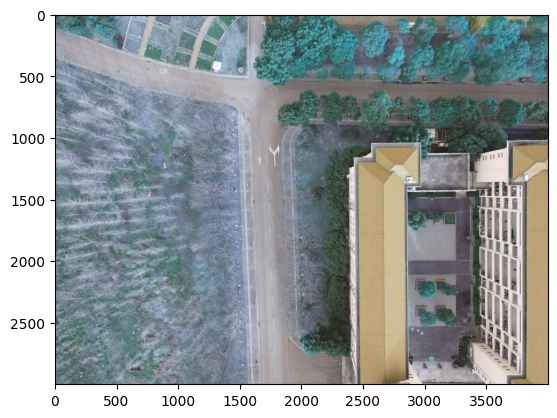

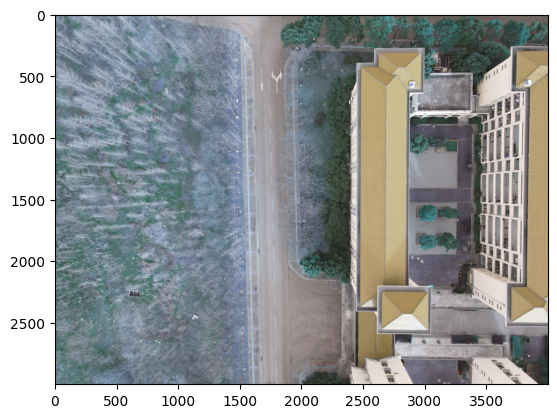

In [4]:
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

In [4]:
sift=cv2.SIFT_create(nfeatures=20000)
k0,d0=sift.detectAndCompute(im0,None)
k1,d1=sift.detectAndCompute(im1,None)
k2,d2=sift.detectAndCompute(im2,None)

In [5]:
bf=cv2.BFMatcher(cv2.NORM_L2,crossCheck=False)
matches0=bf.knnMatch(d0,d1,k=2)
matches1=bf.knnMatch(d1,d2,k=2)

In [6]:
good0=[]
for m,n in matches0:
    if m.distance<0.8*n.distance:
        good0.append(m)
print(len(good0))

1538


In [7]:
good1=[]
for m,n in matches1:
    if m.distance<0.8*n.distance:
        good1.append(m)
print(len(good1))

1430


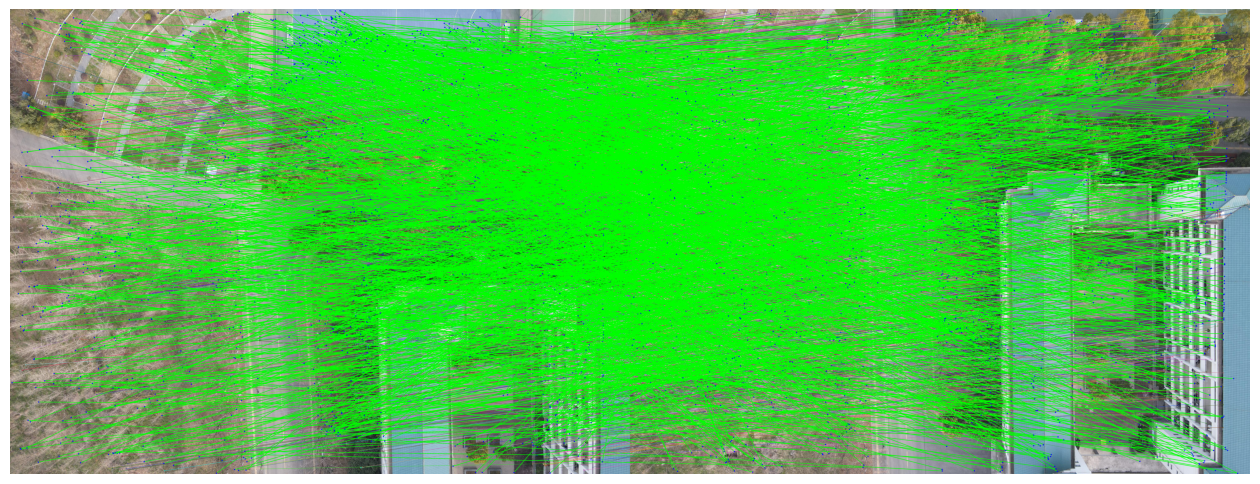

In [8]:
match_img = cv2.drawMatches(im0, k0, im1, k1, good0, None,
                                    matchesMask=None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
h1, w1 = im0.shape[:2]
for i, m in enumerate(good0):
    
    pt1 = tuple(np.round(k1[m.queryIdx].pt).astype(int))
    pt2 = tuple(np.round(k2[m.trainIdx].pt).astype(int))
    pt2_shifted = (int(pt2[0] + w1), int(pt2[1]))  # car concaténation horizontale

    cv2.line(match_img, pt1, pt2_shifted, (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    cv2.circle(match_img, pt1, 4, (255,0,0), -1)
    cv2.circle(match_img, pt2_shifted, 4, (255,0,0), -1)

plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

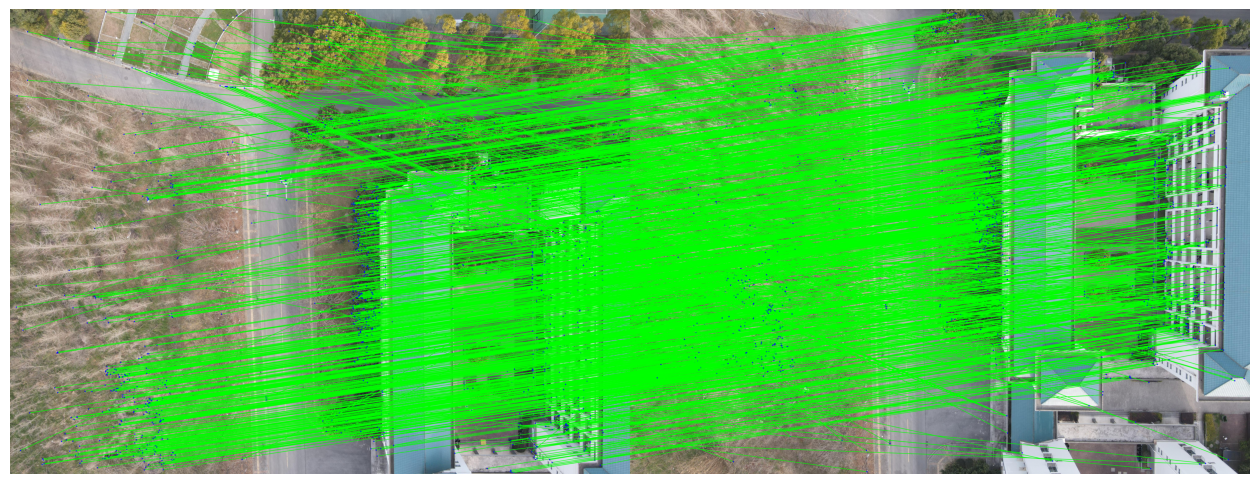

In [9]:
match_img = cv2.drawMatches(im1, k1, im2, k2, good1, None,
                                    matchesMask=None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
h1, w1 = im1.shape[:2]
for i, m in enumerate(good1):
    
    pt1 = tuple(np.round(k1[m.queryIdx].pt).astype(int))
    pt2 = tuple(np.round(k2[m.trainIdx].pt).astype(int))
    pt2_shifted = (int(pt2[0] + w1), int(pt2[1]))  # car concaténation horizontale

    cv2.line(match_img, pt1, pt2_shifted, (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    cv2.circle(match_img, pt1, 4, (255,0,0), -1)
    cv2.circle(match_img, pt2_shifted, 4, (255,0,0), -1)

plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
distances0=[]
points0=[]
for g in good0:
    q=g.queryIdx
    t=g.trainIdx
    pos1=np.round(k0[q].pt).astype(int)
    pos2=np.round(k1[t].pt).astype(int)
    #print(pos1,pos2)
    points0.append((pos1,pos2))
    dist=np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)
    distances0.append(dist)
res0=np.mean(distances0)
print(res0)
pts0=np.array(points0)
min_idx0=np.argmin(pts0[:,1,1])
l01=pts0[min_idx0][0,1]
max_idx0=np.argmax(pts0[:,0,1])
l02=pts0[max_idx0][1,1]
# pt=pts[min_idx]
# dist_pt=np.sqrt((pt[0][0]-pt[1][0])**2+(pt[0][1]-pt[1][1])**2)
#Attention, il faudras vérifier que les distances ne sont pas trop éloignés de la distance moyenne sinon ça veut dire que c'est un mauvais keypoint
#(+-10% de la valeure initiale je pense)

699.816769705138


In [42]:
print(l01,l02)

695 2376


In [11]:
im1.shape

(3000, 4000, 3)

In [11]:
distances1=[]
points1=[]
for g in good1:
    q=g.queryIdx
    t=g.trainIdx
    pos1=np.round(k1[q].pt).astype(int)
    pos2=np.round(k2[t].pt).astype(int)
    #print(pos1,pos2)
    points1.append((pos1,pos2))
    dist=np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)
    distances1.append(dist)
res1=np.mean(distances1)
print(res1)
pts1=np.array(points1)
min_idx1=np.argmin(pts1[:,1,1])
l11=pts1[min_idx1][0,1]
max_idx1=np.argmax(pts1[:,0,1])
l12=pts1[max_idx1][1,1]
# pt=pts[min_idx]
# dist_pt=np.sqrt((pt[0][0]-pt[1][0])**2+(pt[0][1]-pt[1][1])**2)
#Attention, il faudras vérifier que les distances ne sont pas trop éloignés de la distance moyenne sinon ça veut dire que c'est un mauvais keypoint
#(+-10% de la valeure initiale je pense)

716.5382117026363


In [45]:
print(l11,l12)

705 2382


In [12]:
rows,cols=10,10
selected_pts1 = []
#selected_pts2 = []
shap0=im1.shape
shap1=im2.shape

stepy0=(shap0[0]-l11)//rows
stepy1=l12//rows
stepx0=shap0[1]//cols
stepx1=shap1[1]//cols

for i in range(rows):
    for j in range(cols):

        y00 = l11 + i * stepy0
        y01 = y00 + stepy0
        x00 = 0 + j * stepx0
        x01 = x00 + stepx0

        y10 = i * stepy1
        y11 = y10 + stepy1
        x10 = 0 + j * stepx1
        x11 = x10 + stepx1



        in_cell = ((pts1[:,0,0] >= x00) & (pts1[:,0,0] < x01) &
                   (pts1[:,0,1] >= y00) & (pts1[:,0,1] < y01) &
                   (pts1[:,1,0] >= x10) & (pts1[:,1,0] < x11) &
                   (pts1[:,1,1] >= y10) & (pts1[:,1,1] < y11))
       
        candidates = np.where(in_cell)[0]
        if len(candidates) > 0:
            idx = np.random.choice(candidates)
            selected_pts1.append(idx)
       
           # selected_pts1.append(pts1_overlap[idx])
            #selected_pts2.append(pts2_overlap[idx])

In [50]:
len(selected_pts1)

67

In [14]:
np.round(k1[4].pt)

array([2731., 1260.])

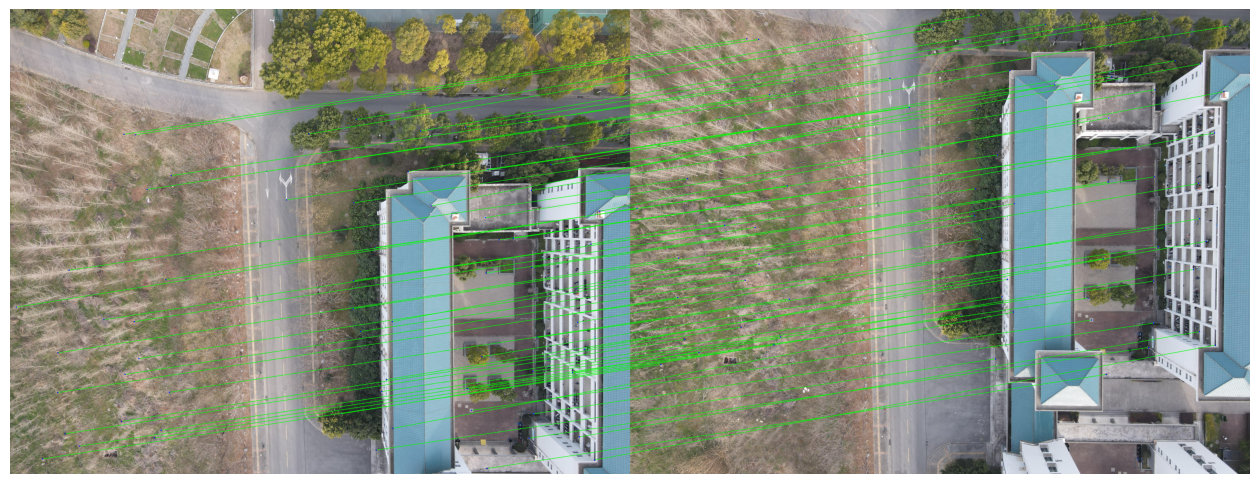

In [13]:
god=[good1[i] for i in selected_pts1]
match_img = cv2.drawMatches(im1, k1, im2, k2, god, None,
                                    matchesMask=None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
h1, w1 = im1.shape[:2]
for i, m in enumerate(god):
    
    pt1 = tuple(np.round(k1[m.queryIdx].pt).astype(int))
    pt2 = tuple(np.round(k2[m.trainIdx].pt).astype(int))
    pt2_shifted = (int(pt2[0] + w1), int(pt2[1]))  # car concaténation horizontale

    cv2.line(match_img, pt1, pt2_shifted, (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    cv2.circle(match_img, pt1, 4, (255,0,0), -1)
    cv2.circle(match_img, pt2_shifted, 4, (255,0,0), -1)

plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [14]:
rows,cols=10,10
selected_pts0 = []
#selected_pts2 = []
shap0=im0.shape
shap1=im1.shape

stepy0=(shap0[0]-l01)//rows
stepy1=l02//rows
stepx0=shap0[1]//cols
stepx1=shap1[1]//cols

for i in range(rows):
    for j in range(cols):

        y00 = l11 + i * stepy0
        y01 = y00 + stepy0
        x00 = 0 + j * stepx0
        x01 = x00 + stepx0

        y10 = i * stepy1
        y11 = y10 + stepy1
        x10 = 0 + j * stepx1
        x11 = x10 + stepx1



        in_cell = ((pts0[:,0,0] >= x00) & (pts0[:,0,0] < x01) &
                   (pts0[:,0,1] >= y00) & (pts0[:,0,1] < y01) &
                   (pts0[:,1,0] >= x10) & (pts0[:,1,0] < x11) &
                   (pts0[:,1,1] >= y10) & (pts0[:,1,1] < y11))
       
        candidates = np.where(in_cell)[0]
        if len(candidates) > 0:
            idx = np.random.choice(candidates)
            selected_pts0.append(idx)
       
           # selected_pts1.append(pts1_overlap[idx])
            #selected_pts2.append(pts2_overlap[idx])

In [52]:
len(selected_pts0)

68

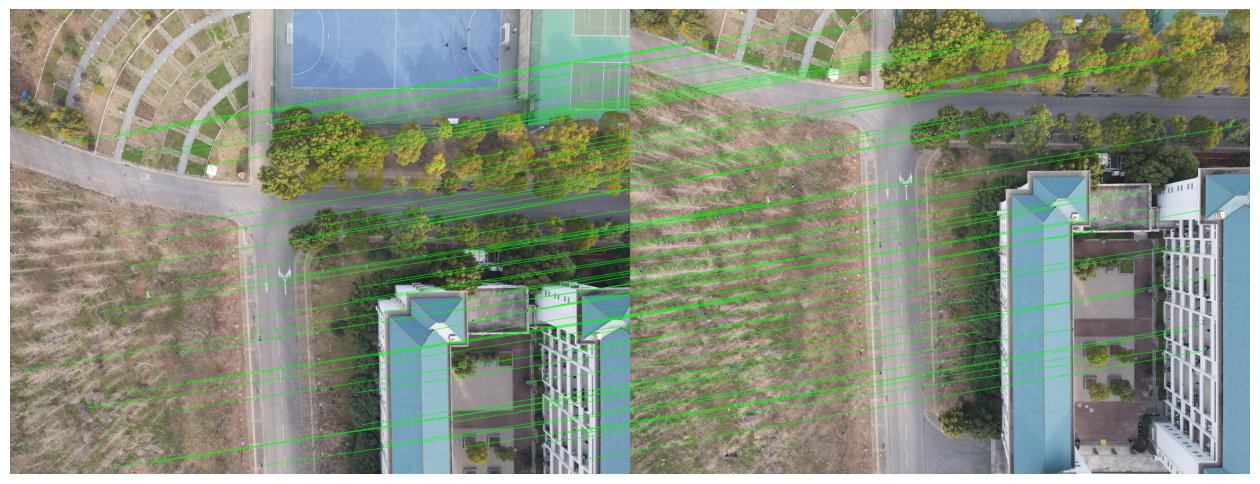

In [15]:
god=[good0[i] for i in selected_pts0]
match_img = cv2.drawMatches(im0, k0, im1, k1, god, None,
                                    matchesMask=None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
h1, w1 = im0.shape[:2]
for i, m in enumerate(god):
    
    pt1 = tuple(np.round(k0[m.queryIdx].pt).astype(int))
    pt2 = tuple(np.round(k1[m.trainIdx].pt).astype(int))
    pt2_shifted = (int(pt2[0] + w1), int(pt2[1]))  # car concaténation horizontale

    cv2.line(match_img, pt1, pt2_shifted, (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    cv2.circle(match_img, pt1, 4, (255,0,0), -1)
    cv2.circle(match_img, pt2_shifted, 4, (255,0,0), -1)

plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
ptsA=np.array([pts[i][0] for i in selected_pts])
ptsB=np.array([pts[i][1] for i in selected_pts])

In [12]:
CA=np.hstack([ptsA,np.ones((ptsA.shape[0],1))]).T
CB=np.hstack([ptsB,np.ones((ptsB.shape[0],1))]).T

In [13]:
affine1,_=cv2.estimateAffine2D(ptsA,ptsB)

In [14]:
M_affine = np.vstack([affine1, [0, 0, 1]])

In [ ]:
M_affine

array([[ 1.00116822e+00, -1.17245765e-02,  2.77869587e+01],
       [ 6.86527741e-03,  1.00541779e+00, -6.23828843e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [15]:
T1=M_affine[0]
T2=M_affine[1]

In [16]:
def transform_affine_constrained(params, ptsi,ptsj):
    """Applique la transformation affine contrainte (a=e, d=-b)."""
    ai, bi, ci,di,ei, fi, aj, bj, cj,dj,ej, fj = params

    T1i=np.array([ai,bi,ci])
    T2i=np.array([di,ei,fi])
    T1j=np.array([aj,bj,cj])
    T2j=np.array([dj,ej,fj])
    res1i=T1i@ptsi
    res2i=T2i@ptsi
    res1j=T1j@ptsj
    res2j=T2j@ptsj
    return (res1i,res2i,res1j,res2j)

def residuals(params,Ci, Cj):
    #Ci, Cj=C
    """Fonction de coût : T(Ci) ≈ Cj"""
    Mi1,Mi2,Mj1,Mj2 = transform_affine_constrained(params, Ci,Cj)
    res=(Mi1-Mj1)@((Mi1-Mj1).T)+(Mi2-Mj2)@((Mi2-Mj2).T)
    return res

In [17]:
from scipy.optimize import least_squares
initial_guess=np.tile([1,0,0,0,1,0],2)
# Lancement de l'optimisation
result = least_squares(residuals, initial_guess, args=(CA, CB))

# Résultat : paramètres estimés
ai, bi, ci,di,ei, fi, aj, bj, cj,dj,ej, fj = result.x


In [18]:
T_affinej = np.array([
    [aj, bj, cj],
    [dj, ej, fj]
])
T_affinei = np.array([
    [ai, bi, ci],
    [di, ei, fi]
])

In [19]:
T_affinej

array([[ 9.46503254e-01,  1.09953152e-02, -4.01840282e-05],
       [ 1.43780626e-02,  8.95553195e-02,  2.78104421e-03]])

In [20]:
T_affinei

array([[ 9.51172561e-01,  7.17794921e-03,  4.01840282e-05],
       [ 3.79459708e-03,  7.40835804e-02, -2.78104421e-03]])

In [21]:
tsti=np.array([3093,972,1])
tstj=np.array([2407,945,1])
print(np.dot(T_affinei,tsti))
print(np.dot(T_affinej,tstj))

[2948.95373937   83.74314786]
[2288.62386397  119.24055453]


In [22]:
from scipy.optimize import least_squares

def optimize_affine_global(correspondences, num_images):
    """
    Optimise globalement les transformations affines des images en minimisant l'erreur de reprojection sur toutes les correspondances.
    La première image (index 0) est fixée comme référence (transformée identité) pour définir le repère global.
    Retourne une liste de matrices affines 2x3 (numpy.ndarray) de longueur num_images.
    """
    # Initialisation des paramètres: 6 paramètres par image (sauf la première fixée à l'identité)
    # Paramètres initiaux : identité pour toutes les images (affine = [[1,0,0],[0,1,0]])
    # On n'optimise pas les 6 premiers paramètres (image 0), on optimise les autres.
    # On construit le vecteur initial des paramètres (pour images 1 à N-1)
    init_params = []
    for img_index in range(1, num_images):
        init_params.extend([1.0, 0.0, 0.0, 0.0, 1.0, 0.0])  # a, b, tx, c, d, ty pour une matrice affine 2x3
    init_params = np.array(init_params, dtype=float)
    
    # Fonction de coût calculant les résidus (différences) pour toutes les correspondances
    def residuals_affine(params):
        residuals = []
        # Reconstruit les matrices affines pour chaque image à partir du vecteur de paramètres
        # La première image (index 0) est identité: A0 = [[1,0,0],[0,1,0]]
        # Pour chaque autre image k, extrait ses 6 paramètres optimisés
        affine_matrices = [None] * num_images
        affine_matrices[0] = np.array([[1.0, 0.0, 0.0],   # Identité pour image 0
                                       [0.0, 1.0, 0.0]])
        for k in range(1, num_images):
            # paramètres de l'image k dans le vecteur params
            a, b, tx, c, d, ty = params[(k-1)*6 : (k-1)*6 + 6]
            affine_matrices[k] = np.array([[a, b, tx],
                                           [c, d, ty]])
        # Calcul des erreurs de chaque correspondance
        for (i, j, pt_i, pt_j) in correspondences:
            # Coordonnées homogènes du point (ajout de 1)
            x_i, y_i = pt_i
            x_j, y_j = pt_j
            # Transformation affine du point dans chaque image
            if i == 0:
                # transformation de l'image i (identité si i=0)
                x_i_trans, y_i_trans = x_i, y_i
            else:
                A_i = affine_matrices[i]
                x_i_trans = A_i[0,0]*x_i + A_i[0,1]*y_i + A_i[0,2]
                y_i_trans = A_i[1,0]*x_i + A_i[1,1]*y_i + A_i[1,2]
            if j == 0:
                x_j_trans, y_j_trans = x_j, y_j
            else:
                A_j = affine_matrices[j]
                x_j_trans = A_j[0,0]*x_j + A_j[0,1]*y_j + A_j[0,2]
                y_j_trans = A_j[1,0]*x_j + A_j[1,1]*y_j + A_j[1,2]
            # Différence entre les points transformés (erreur de correspondance)
            residuals.append(x_i_trans - x_j_trans)
            residuals.append(y_i_trans - y_j_trans)
        return np.array(residuals, dtype=float)
    
    # Optimisation par moindres carrés (Levenberg-Marquardt)
    result = least_squares(residuals_affine, init_params, method='lm')
    
    # Construction de la liste finale des matrices affines optimisées (incluant l'identité pour la première image)
    optimized_params = result.x
    affine_matrices = []
    # Image 0: identité
    affine_matrices.append(np.array([[1.0, 0.0, 0.0],
                                     [0.0, 1.0, 0.0]]))
    # Autres images: paramètres optimisés
    for k in range(1, num_images):
        a, b, tx, c, d, ty = optimized_params[(k-1)*6 : (k-1)*6 + 6]
        A_k = np.array([[a, b, tx],
                        [c, d, ty]])
        affine_matrices.append(A_k)
    return affine_matrices

# Exemple d'utilisation:
# affine_transforms = optimize_affine_global(correspondences, num_images=len(images))


In [24]:
pts.shape

(1430, 2, 2)

In [66]:
correspondances=[(0,1,i[0],i[1]) for i in pts0]+[(1,2,i[0],i[1]) for i in pts1]

In [69]:
affine_transforms = optimize_affine_global(correspondances, 3)

In [70]:
affine_transforms

[array([[1., 0., 0.],
        [0., 1., 0.]]),
 array([[7.75568558e-01, 6.37654063e-02, 4.24476424e+02],
        [1.36591724e-01, 5.24993231e-01, 7.96953946e+02]]),
 array([[7.25891236e-01, 3.70480031e-02, 5.86227087e+02],
        [1.20592665e-01, 3.58765257e-01, 1.30926204e+03]])]

In [71]:
tsti=np.array([3093,972,1])
tstj=np.array([2407,945,1])

print(np.dot(affine_transforms[1],tsti))

[2885.28994787 1729.72556932]


In [99]:
T_test, inliers = cv2.estimateAffine2D(ptsA, ptsB)
print(T_test)

[[ 1.00116822e+00 -1.17245765e-02  2.77869587e+01]
 [ 6.86527741e-03  1.00541779e+00 -6.23828843e+02]]


In [103]:
initial_guess

array([1, 0, 0, 0, 1, 0, 0, 0])

In [104]:
from scipy.optimize import minimize
res = minimize(residuals, initial_guess,args=(CA,CB))

In [72]:
src=pts1[:,0]
dst=pts1[:,1]
M,_=cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

In [73]:
M

array([[ 1.00302335e+00, -1.24576556e-02,  2.83382898e+01],
       [ 5.38841223e-03,  1.00357020e+00, -6.16560204e+02],
       [ 2.24490216e-07,  2.33886015e-07,  1.00000000e+00]])

In [77]:
def merge(im1,im2,H):
        rows1, cols1 = im1.shape[:2]
        rows2, cols2 = im2.shape[:2]

        list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2) #coordinates of a reference image
        temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2) #coordinates of second image

        list_of_points_2 = cv2.perspectiveTransform(temp_points, H)#calculate the transformation matrix

        list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

        [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
        [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
        
        translation_dist = [-x_min,-y_min]
        
        H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

        output_img = cv2.warpPerspective(im2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
        output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = im1

        return output_img

In [86]:
truc=np.array([[7.75568558e-01, 6.37654063e-02, 4.24476424e+02],
        [1.36591724e-01, 5.24993231e-01, 7.96953946e+02],
        [0,0,1]])

In [91]:
res=merge(im2,im1,truc)

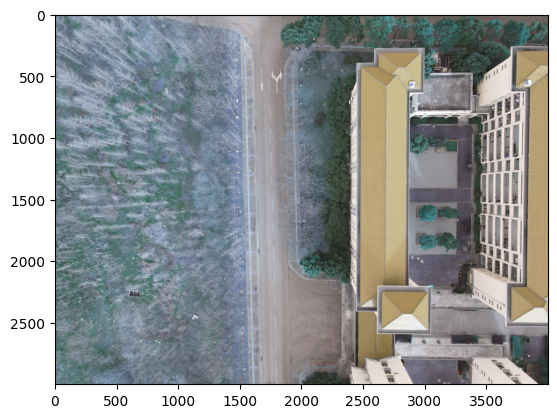

In [92]:
plt.imshow(res)
plt.show()

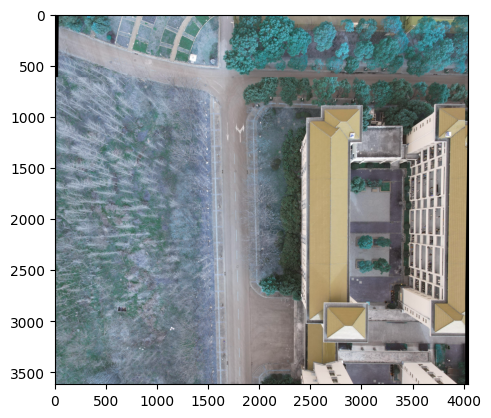

In [90]:
plt.imshow(res)
plt.show()

In [107]:
T_affinej = np.array([
    [aj, bj, cj],
    [-bj, aj, fj]
])
T_affinei = np.array([
    [ai, bi, ci],
    [-bi, ai, fi]
])

In [76]:
tsti=np.array([2040,  199,1])
tstj=np.array([2234, 2115,1])
print(np.dot(M,tsti))
#print(np.dot(T_affinej,tstj))

[ 2.07202686e+03 -4.05857373e+02  1.00050450e+00]


In [124]:
import numpy as np
from scipy.optimize import minimize

def loss(params, p, q):
    # Extraire les paramètres
    A1 = params[0:4].reshape(2, 2)
    b1 = params[4:6]
    A2 = params[6:10].reshape(2, 2)
    b2 = params[10:12]

    # Transformation
    p_trans = (A1 @ p.T).T + b1
    q_trans = (A2 @ q.T).T + b2

    # Différence des points alignés
    diff = p_trans - q_trans
    return np.sum(diff**2)

def optimize_affine_pair(p, q):
    # p, q: Nx2 numpy arrays
    assert p.shape == q.shape

    # Initialisation des affines à identité + 0
    x0 = np.hstack([
        np.eye(2).flatten(),  # A1
        np.zeros(2),          # b1
        np.eye(2).flatten(),  # A2
        np.zeros(2)           # b2
    ])

    res = minimize(loss, x0, args=(p, q), method='L-BFGS-B')

    if not res.success:
        raise RuntimeError("Optimisation échouée : " + res.message)

    # Résultat
    A1 = res.x[0:4].reshape(2, 2)
    b1 = res.x[4:6]
    A2 = res.x[6:10].reshape(2, 2)
    b2 = res.x[10:12]
    return A1, b1, A2, b2


In [118]:
pts[0]

array([[2040,  199],
       [2234, 2115]])

In [ ]:
def apply_affine(params, pts):
    """
    Applique une transformation affine contrainte (a, b, c, f) à des points.
    T = [[a, b, c], [-b, a, f]]
    - params : (a, b, c, f)
    - pts : tableau (N, 2)
    Retourne : points transformés (N, 2)
    """
    a, b, c, f = params
    T = np.array([
        [a, b, c],
        [-b, a, f]
    ])
    pts_h = np.hstack([pts, np.ones((pts.shape[0], 1))])  # homogénéisation
    return (T @ pts_h.T).T

def extract_T(params, i):
    """
    Extrait les paramètres (a, b, c, f) de l'image i depuis le vecteur global params.
    - params : vecteur (4 * n_images,)
    - i : index de l’image
    Retourne : (a, b, c, f)
    """
    return params[i*4:(i+1)*4]

def residuals_global(params, match_graph, n_images):
    """
    Fonction de coût globale pour l'optimisation.
    - params : vecteur (4 * n_images,)
    - match_graph : liste de tuples (i, j, pts_i, pts_j)
    Retourne : vecteur concaténé des résidus (2N,)
    """
    res = []
    for (i, j, pts_i, pts_j) in match_graph:
        Ti = extract_T(params, i)
        Tj = extract_T(params, j)
        Pi = apply_affine(Ti, pts_i)
        Pj = apply_affine(Tj, pts_j)
        diff = Pi - Pj  # erreur (N, 2)
        res.append(diff.ravel())  # convertir en vecteur (2N,)
    return np.concatenate(res)

def residuals_with_anchor(params_free, match_graph):
    """
    Version modifiée de la fonction de coût où l'image 0 est fixée.
    - params_free : vecteur des paramètres pour les images 1..N
    - match_graph : correspondances
    Retourne : résidu global en fixant T0 = identité
    """
    params = np.concatenate([[1, 0, 0, 0], params_free])  # T0 fixé à l'identité
    return residuals_global(params, match_graph, n_images=len(params)//4)

from scipy.optimize import least_squares
def optimize_global_affines(match_graph, n_images):
    """
    Lance l’optimisation pour trouver tous les T_i.
    - match_graph : liste (i, j, pts_i, pts_j)
    - n_images : nombre total d’images
    Retour : vecteur (4 * n_images,) des paramètres
    """
    initial_params = np.tile([1, 0, 0, 0], n_images)
    params_free_init = initial_params[4:]  # on ne garde pas T0
    result = least_squares(
        residuals_with_anchor,
        params_free_init,
        args=(match_graph,),
        method='trf'  # ou 'dogbox'
    )
    return np.concatenate([[1, 0, 0, 0], result.x])  

def get_all_affine_matrices(global_params):
    """
    Reconstruit les matrices 2x3 à partir des paramètres optimisés.
    - global_params : vecteur (4 * n_images,)
    Retour : liste de matrices 2x3
    """
    n_images = len(global_params) // 4
    matrices = []
    for i in range(n_images):
        a, b, c, f = extract_T(global_params, i)
        T = np.array([
            [a, b, c],
            [-b, a, f]
        ])
        matrices.append(T)
    return matrices


In [137]:
pts

array([[[2040,  199],
        [2234, 2115]],

       [[1926,  817],
        [1954,  140]],

       [[1926,  817],
        [1954,  140]],

       ...,

       [[2239, 1220],
        [2257,  620]],

       [[ 879, 2317],
        [ 880, 1714]],

       [[ 771, 2464],
        [ 770, 1858]]])

In [140]:
match_graph=[(0,1,pts[:,0],pts[:,1])]

In [141]:
global_params = optimize_global_affines(match_graph, 2)

In [142]:
matrices_affines = get_all_affine_matrices(global_params)

In [143]:
matrices_affines

[array([[ 1.,  0.,  0.],
        [-0.,  1.,  0.]]),
 array([[ 8.69571711e-01, -1.63978965e-02,  3.03317362e+02],
        [ 1.63978965e-02,  8.69571711e-01,  6.12313627e+02]])]

In [144]:
T_affinei=matrices_affines[0]
T_affinej=matrices_affines[1]

In [145]:
tsti=np.array([2040,  199,1])
tstj=np.array([2234, 2115,1])
print(np.dot(T_affinei,tsti))
print(np.dot(T_affinej,tstj))

[2040.  199.]
[2211.25901326 2488.09069672]
